## Import the libraries



In [1]:
import pandas as pd
import os

Car Crashes' Severity Prediction Exploratory Data Analysis
In this step, one should load the data and analyze it. However, I'll load the data and do minimal analysis.

Let's load the data using `pandas` and have a look at the generated `DataFrame`.

In [2]:
dataset_path = 'E:\My Cv\github\Car Crashes Severity Prediction'

df = pd.read_csv(os.path.join(dataset_path, 'train.csv'))

print("The shape of the dataset is {}.\n\n".format(df.shape))
df_train= df.replace({False:0,True :1})

df_train.head()

The shape of the dataset is (6407, 16).




,ID,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,Severity,timestamp
0,0,37.762150,-122.405660,0,0.044,0,0,0,0,0,0,0,1,R,2,2016-03-25 15:13:02
1,1,37.719157,-122.448254,0,0.000,0,0,0,0,0,0,0,0,R,2,2020-05-05 19:23:00
2,2,37.808498,-122.366852,0,0.000,0,0,0,0,0,0,1,0,R,3,2016-09-16 19:57:16
3,3,37.785930,-122.391080,0,0.009,0,0,1,0,0,0,0,0,R,1,2020-03-29 19:48:43
4,4,37.719141,-122.448457,0,0.000,0,0,0,0,0,0,0,0,R,2,2019-10-09 08:47:00


In [3]:
#change timestamp
for i,val in enumerate(df_train['timestamp']):
    df_train['timestamp'][i] = df_train['timestamp'][i].split(":")[0]

df_train.drop(['Give_Way', 'Bump','No_Exit','Roundabout','Side'], axis = 1 , inplace = True )
df_train


C:\Users\Asyia\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ID,Lat,Lng,Distance(mi),Crossing,Junction,Railway,Stop,Amenity,Severity,timestamp
0,0,37.762150,-122.405660,0.044,0,0,0,0,1,2,2016-03-25 15
1,1,37.719157,-122.448254,0.000,0,0,0,0,0,2,2020-05-05 19
2,2,37.808498,-122.366852,0.000,0,0,0,1,0,3,2016-09-16 19
3,3,37.785930,-122.391080,0.009,0,1,0,0,0,1,2020-03-29 19
4,4,37.719141,-122.448457,0.000,0,0,0,0,0,2,2019-10-09 08
...,...,...,...,...,...,...,...,...,...,...,...
6402,6402,37.740630,-122.407930,0.368,0,0,0,0,0,3,2017-10-01 18
6403,6403,37.752755,-122.402790,0.639,0,1,0,0,0,2,2018-10-23 07
6404,6404,37.726304,-122.446015,0.000,0,1,0,0,0,2,2019-10-28 15
6405,6405,37.808090,-122.367211,0.000,0,1,0,0,0,3,2019-05-04 13


In [4]:
#Data visualization
import numpy as np
import seaborn as sn
corrMatrix = df_train.corr()
mask2 = np.array(corrMatrix)

mask2[np.tril_indices_from(mask2)] = False

sn.heatmap(corrMatrix,mask=mask2, annot=True)

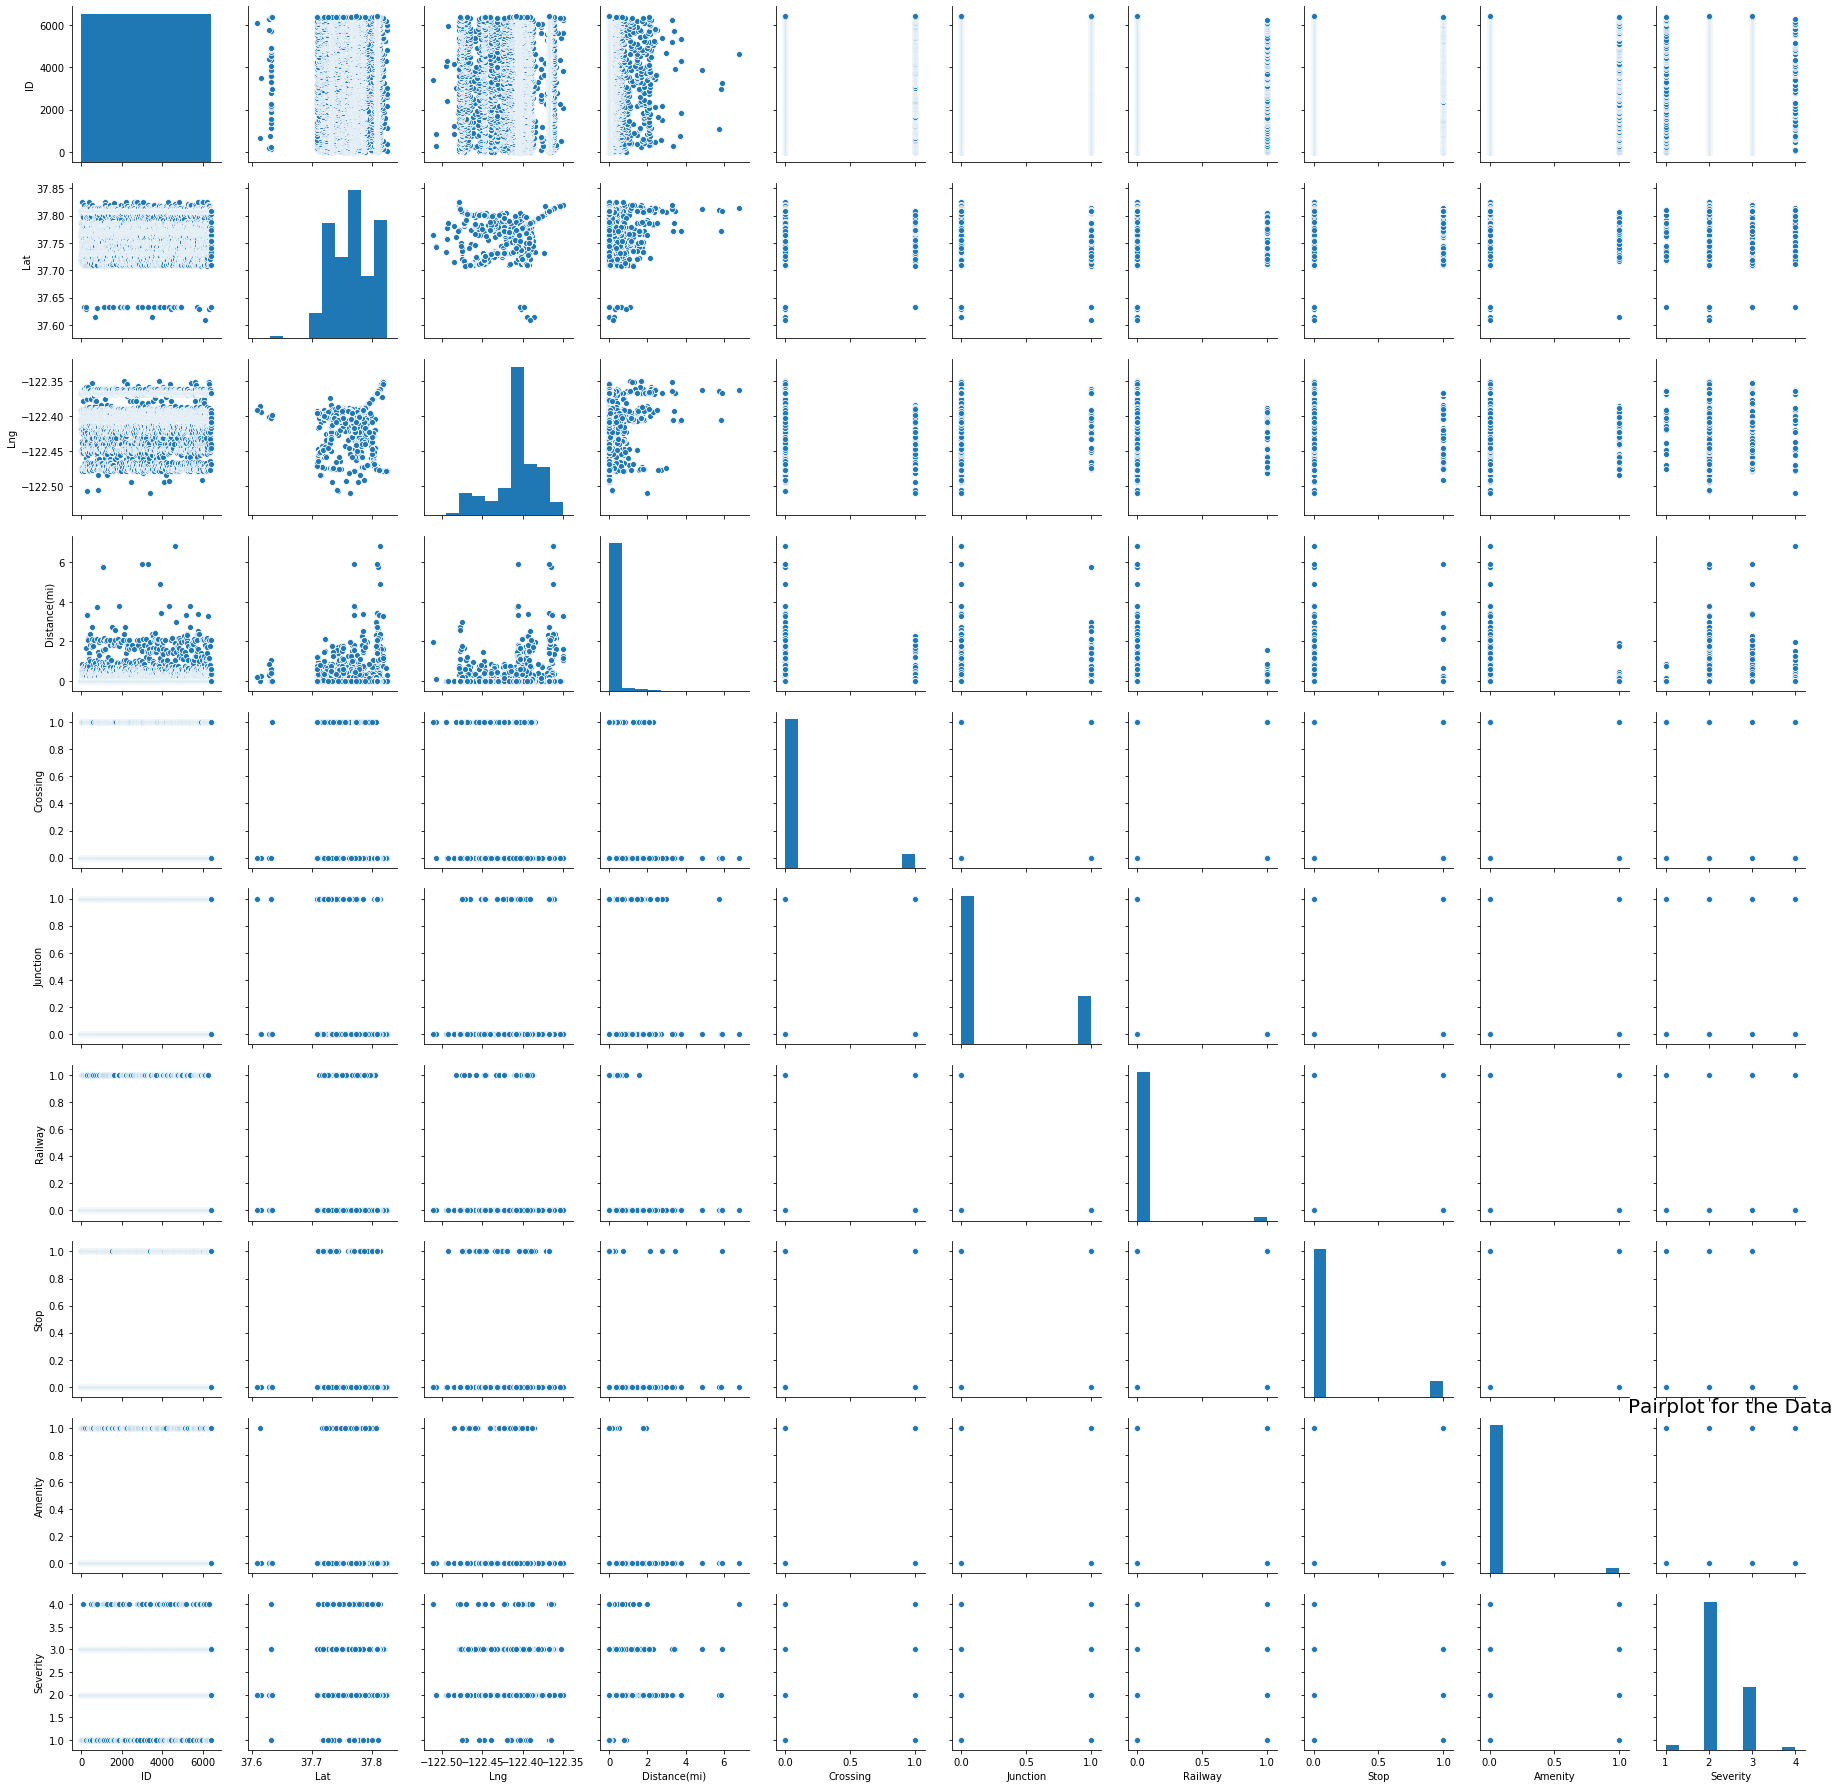

In [5]:

import matplotlib.pyplot as plt
import seaborn as sn
sn.pairplot(df_train)
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

# weather dataframe

In [7]:
dataset_path = 'E:\My Cv\github\Car Crashes Severity Prediction'
weather_df =  pd.read_csv(os.path.join(dataset_path, 'weather-sfcsv.csv'), converters={'Month': lambda x: str(x), 'Day':lambda x: str(x), 'Hour':lambda x: str(x)})
print("The shape of the dataset is {}.\n\n".format(weather_df.shape))
weather_df["timestamp"] = weather_df["Year"].astype(str) +"-"+ weather_df["Month"].astype(str)+"-"+ weather_df["Day"].astype(str)+" "+weather_df["Hour"].astype(str)
converters={'project_id': lambda x: str(x)}
weather_df["Weather_Condition"] = weather_df["Weather_Condition"] .astype('category')
weather_df["Weather_Condition"] = weather_df["Weather_Condition"].cat.codes
print(weather_df.shape)

weather_df.head()


The shape of the dataset is (6901, 12).


(6901, 13)


,Year,Day,Month,Hour,Weather_Condition,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),Selected,timestamp
0,2020,27,07,18,3,64.0,0.0,64.0,70.0,20.0,10.0,No,2020-07-27 18
1,2017,30,09,17,17,NaN,NaN,71.1,57.0,9.2,10.0,No,2017-09-30 17
2,2017,27,06,05,16,NaN,NaN,57.9,87.0,15.0,9.0,No,2017-06-27 05
3,2016,07,09,09,0,NaN,NaN,66.9,73.0,4.6,10.0,No,2016-09-07 09
4,2019,19,10,02,3,52.0,0.0,52.0,89.0,0.0,9.0,No,2019-10-19 02


In [8]:
weather_df = weather_df.drop_duplicates(subset = ["timestamp"])

weather_df.shape

(5972, 13)

In [9]:
weather_df.drop(['Wind_Chill(F)', 'Precipitation(in)','Selected','Year','Day','Month','Hour'], axis = 1 , inplace = True )
weather_df["Weather_Condition"] = weather_df["Weather_Condition"] .astype('category')
weather_df["Weather_Condition"] = weather_df["Weather_Condition"].cat.codes
weather_df.dropna(inplace = True)
weather_df.shape


(5662, 6)

# Holiday dataframe

In [10]:
#Load xml file
import xml.etree.ElementTree as etree

tree = etree.parse("E:/My Cv/github/Car Crashes Severity Prediction/holidays.xml")

root = tree.getroot()

columns = ["date","description"]

holiday_df = pd.DataFrame(columns = columns)

for node in root: 

    description = node.find("description").text if node is not None else None

    date = node.find("date").text if node is not None else None

    holiday_df = holiday_df.append(pd.Series([date, description], index = columns), ignore_index = True)

In [11]:

new_holiday_df = holiday_df.rename(columns={"date": "timestamp"})
#new_holiday_df

new_holiday_df

,timestamp,description
0,2012-01-02,New Year Day
1,2012-01-16,Martin Luther King Jr. Day
2,2012-02-20,Presidents Day (Washingtons Birthday)
3,2012-05-28,Memorial Day
4,2012-07-04,Independence Day
...,...,...
85,2020-09-07,Labor Day
86,2020-10-12,Columbus Day
87,2020-11-11,Veterans Day
88,2020-11-26,Thanksgiving Day


In [12]:
for i,val in enumerate(new_holiday_df['description']):
    new_holiday_df['description'][i] = 1
new_holiday_df


,timestamp,description
0,2012-01-02,1
1,2012-01-16,1
2,2012-02-20,1
3,2012-05-28,1
4,2012-07-04,1
...,...,...
85,2020-09-07,1
86,2020-10-12,1
87,2020-11-11,1
88,2020-11-26,1


In [13]:
#merge train and weather:
merged_df = pd.merge(df_train, weather_df, 
                   on='timestamp', 
                   how='left')

#change timestemp to match holidays_df
# displaying result
for i,val in enumerate(merged_df['timestamp']):
    merged_df['timestamp'][i] = merged_df['timestamp'][i].split(" ")[0]
merged_df = merged_df.fillna(merged_df.median())
merged_df


C:\Users\Asyia\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,ID,Lat,Lng,Distance(mi),Crossing,Junction,Railway,Stop,Amenity,Severity,timestamp,Weather_Condition,Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi)
0,0,37.762150,-122.405660,0.044,0,0,0,0,1,2,2016-03-25,23.0,64.0,58.0,23.0,10.0
1,1,37.719157,-122.448254,0.000,0,0,0,0,0,2,2020-05-05,16.0,57.0,83.0,22.0,10.0
2,2,37.808498,-122.366852,0.000,0,0,0,1,0,3,2016-09-16,1.0,62.1,80.0,9.2,10.0
3,3,37.785930,-122.391080,0.009,0,1,0,0,0,1,2020-03-29,4.0,58.0,70.0,10.0,10.0
4,4,37.719141,-122.448457,0.000,0,0,0,0,0,2,2019-10-09,4.0,58.0,65.0,3.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6402,6402,37.740630,-122.407930,0.368,0,0,0,0,0,3,2017-10-01,23.0,61.0,62.0,17.3,10.0
6403,6403,37.752755,-122.402790,0.639,0,1,0,0,0,2,2018-10-23,15.0,57.0,72.0,6.9,10.0
6404,6404,37.726304,-122.446015,0.000,0,1,0,0,0,2,2019-10-28,4.0,71.0,16.0,9.0,10.0
6405,6405,37.808090,-122.367211,0.000,0,1,0,0,0,3,2019-05-04,4.0,63.0,58.0,13.0,10.0


In [14]:
#merge train and holiday:
merged_df2 = pd.merge(merged_df, new_holiday_df, 
                   on='timestamp', 
                   how='left')
# fill nulls with zero
merged_df2['description'] = merged_df2['description'].fillna(0)


In [15]:
merged_df2.head()

,ID,Lat,Lng,Distance(mi),Crossing,Junction,Railway,Stop,Amenity,Severity,timestamp,Weather_Condition,Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),description
0,0,37.762150,-122.405660,0.044,0,0,0,0,1,2,2016-03-25,23.0,64.0,58.0,23.0,10.0,0
1,1,37.719157,-122.448254,0.000,0,0,0,0,0,2,2020-05-05,16.0,57.0,83.0,22.0,10.0,0
2,2,37.808498,-122.366852,0.000,0,0,0,1,0,3,2016-09-16,1.0,62.1,80.0,9.2,10.0,0
3,3,37.785930,-122.391080,0.009,0,1,0,0,0,1,2020-03-29,4.0,58.0,70.0,10.0,10.0,0
4,4,37.719141,-122.448457,0.000,0,0,0,0,0,2,2019-10-09,4.0,58.0,65.0,3.0,10.0,0


## Data Splitting

Now it's time to split the dataset for the training step. Typically the dataset is split into 3 subsets, namely, the training, validation and test sets. In our case, the test set is already predefined. So we'll split the "training" set into training and validation sets with 0.8:0.2 ratio. 



In [16]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(merged_df2, test_size=0.2, random_state=42) # Try adding `stratify` here

X_train = train_df.drop(columns=['ID', 'Severity','timestamp'])
y_train = train_df['Severity']

X_val = val_df.drop(columns=['ID', 'Severity','timestamp'])
y_val = val_df['Severity']

X_train



,Lat,Lng,Distance(mi),Crossing,Junction,Railway,Stop,Amenity,Weather_Condition,Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),description
748,37.720890,-122.448044,0.000,1,0,1,0,0,4.0,55.0,64.0,13.0,10.0,0
5720,37.727319,-122.402749,0.000,0,0,0,0,0,15.0,60.0,72.0,8.0,10.0,0
1310,37.731370,-122.423590,0.161,0,0,0,0,0,1.0,59.0,62.0,21.9,10.0,0
5343,37.731860,-122.418282,0.231,0,0,0,0,0,18.0,54.0,40.0,5.8,10.0,0
1480,37.808498,-122.366852,0.000,0,0,0,1,0,18.0,73.0,55.0,9.2,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,37.710819,-122.455711,0.000,0,0,0,0,0,4.0,81.0,31.0,14.0,10.0,0
5191,37.761349,-122.392647,0.000,0,0,0,0,0,18.0,53.1,100.0,5.8,10.0,0
5226,37.725182,-122.401639,0.000,0,1,0,0,0,4.0,83.0,24.0,13.0,10.0,0
5390,37.769646,-122.417847,0.000,1,0,0,0,0,18.0,60.1,78.0,17.3,10.0,0


## Model Training

Let's train a model with the data! I'll train a Random Forest Classifier to demonstrate the process of making submissions. 

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the classifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)

# Train the classifier
classifier = classifier.fit(X_train, y_train)

Now let's test our classifier on the validation dataset and see the accuracy.

In [18]:
print("The accuracy of the classifier on the validation set is ", (classifier.score(X_val, y_val)))

The accuracy of the classifier on the validation set is  0.7441497659906396


## Submission File Generation

We have built a model and we'd like to submit our predictions on the test set! In order to do that, we'll load the test set, predict the class and save the submission file. 

First, we'll load the data.

In [19]:
test_df = pd.read_csv(os.path.join(dataset_path, 'test.csv'))
test_df= test_df.replace({False:0,True :1})
test_df.drop(['Give_Way', 'Bump','No_Exit','Roundabout','Side'], axis = 1 , inplace = True )

test_df

,ID,Lat,Lng,Distance(mi),Crossing,Junction,Railway,Stop,Amenity,timestamp
0,6407,37.786060,-122.390900,0.039,0,1,0,0,0,2016-04-04 19:20:31
1,6408,37.769609,-122.415057,0.202,0,0,0,0,0,2020-10-28 11:51:00
2,6409,37.807495,-122.476021,0.000,0,0,0,0,0,2019-09-09 07:36:45
3,6410,37.761818,-122.405869,0.000,0,1,0,0,0,2019-08-06 15:46:25
4,6411,37.732350,-122.414100,0.670,0,0,0,0,0,2018-10-17 09:54:58
...,...,...,...,...,...,...,...,...,...,...
1596,8003,37.812973,-122.362335,4.460,0,0,0,0,0,2020-06-26 22:32:22
1597,8004,37.761818,-122.405861,0.010,0,1,0,0,0,2016-12-03 07:16:30
1598,8005,37.732260,-122.431970,0.431,0,1,0,0,0,2017-02-20 06:32:44
1599,8006,37.786782,-122.390126,0.000,1,0,0,0,0,2019-10-31 20:35:00


In [20]:
for i,val in enumerate(test_df['timestamp']):
    test_df['timestamp'][i] = test_df['timestamp'][i].split(":")[0]
merged_test_df = pd.merge(test_df, weather_df, 
                  on='timestamp', 
                  how='left')
#merged_test_df.drop(['ID'], axis = 1 , inplace = True )
merged_test_df = merged_test_df.fillna(merged_test_df.median())
merged_test_df
#test_df

C:\Users\Asyia\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ID,Lat,Lng,Distance(mi),Crossing,Junction,Railway,Stop,Amenity,timestamp,Weather_Condition,Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi)
0,6407,37.786060,-122.390900,0.039,0,1,0,0,0,2016-04-04 19,18.0,63.0,60.0,10.4,10.0
1,6408,37.769609,-122.415057,0.202,0,0,0,0,0,2020-10-28 11,4.0,65.0,56.0,5.0,9.0
2,6409,37.807495,-122.476021,0.000,0,0,0,0,0,2019-09-09 07,15.0,58.0,90.0,18.0,10.0
3,6410,37.761818,-122.405869,0.000,0,1,0,0,0,2019-08-06 15,4.0,72.0,59.0,17.0,10.0
4,6411,37.732350,-122.414100,0.670,0,0,0,0,0,2018-10-17 09,23.0,57.0,77.0,5.8,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,8003,37.812973,-122.362335,4.460,0,0,0,0,0,2020-06-26 22,2.0,60.0,86.0,13.0,10.0
1597,8004,37.761818,-122.405861,0.010,0,1,0,0,0,2016-12-03 07,15.0,60.0,70.0,10.0,10.0
1598,8005,37.732260,-122.431970,0.431,0,1,0,0,0,2017-02-20 06,17.0,57.9,84.0,9.2,10.0
1599,8006,37.786782,-122.390126,0.000,1,0,0,0,0,2019-10-31 20,4.0,55.0,40.0,0.0,10.0


In [21]:
for i,val in enumerate(merged_test_df['timestamp']):
    merged_test_df['timestamp'][i] = merged_test_df['timestamp'][i].split(" ")[0]
merged_test_df.head()

C:\Users\Asyia\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ID,Lat,Lng,Distance(mi),Crossing,Junction,Railway,Stop,Amenity,timestamp,Weather_Condition,Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi)
0,6407,37.786060,-122.390900,0.039,0,1,0,0,0,2016-04-04,18.0,63.0,60.0,10.4,10.0
1,6408,37.769609,-122.415057,0.202,0,0,0,0,0,2020-10-28,4.0,65.0,56.0,5.0,9.0
2,6409,37.807495,-122.476021,0.000,0,0,0,0,0,2019-09-09,15.0,58.0,90.0,18.0,10.0
3,6410,37.761818,-122.405869,0.000,0,1,0,0,0,2019-08-06,4.0,72.0,59.0,17.0,10.0
4,6411,37.732350,-122.414100,0.670,0,0,0,0,0,2018-10-17,23.0,57.0,77.0,5.8,10.0


In [22]:
merged_test_df2 = pd.merge(merged_test_df, new_holiday_df, 
                   on='timestamp', 
                   how='left')
  

merged_test_df2['description'] = merged_df2['description'].fillna(0)
merged_test_df2.drop(['timestamp'], axis = 1 , inplace = True )
merged_test_df2

,ID,Lat,Lng,Distance(mi),Crossing,Junction,Railway,Stop,Amenity,Weather_Condition,Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),description
0,6407,37.786060,-122.390900,0.039,0,1,0,0,0,18.0,63.0,60.0,10.4,10.0,0
1,6408,37.769609,-122.415057,0.202,0,0,0,0,0,4.0,65.0,56.0,5.0,9.0,0
2,6409,37.807495,-122.476021,0.000,0,0,0,0,0,15.0,58.0,90.0,18.0,10.0,0
3,6410,37.761818,-122.405869,0.000,0,1,0,0,0,4.0,72.0,59.0,17.0,10.0,0
4,6411,37.732350,-122.414100,0.670,0,0,0,0,0,23.0,57.0,77.0,5.8,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,8003,37.812973,-122.362335,4.460,0,0,0,0,0,2.0,60.0,86.0,13.0,10.0,0
1597,8004,37.761818,-122.405861,0.010,0,1,0,0,0,15.0,60.0,70.0,10.0,10.0,0
1598,8005,37.732260,-122.431970,0.431,0,1,0,0,0,17.0,57.9,84.0,9.2,10.0,0
1599,8006,37.786782,-122.390126,0.000,1,0,0,0,0,4.0,55.0,40.0,0.0,10.0,0


In [23]:
x_test = merged_test_df2.drop(columns=['ID'] )
y_test_predicted = classifier.predict(x_test)

merged_test_df2['Severity'] = y_test_predicted

merged_test_df2
x_test

,Lat,Lng,Distance(mi),Crossing,Junction,Railway,Stop,Amenity,Weather_Condition,Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),description
0,37.786060,-122.390900,0.039,0,1,0,0,0,18.0,63.0,60.0,10.4,10.0,0
1,37.769609,-122.415057,0.202,0,0,0,0,0,4.0,65.0,56.0,5.0,9.0,0
2,37.807495,-122.476021,0.000,0,0,0,0,0,15.0,58.0,90.0,18.0,10.0,0
3,37.761818,-122.405869,0.000,0,1,0,0,0,4.0,72.0,59.0,17.0,10.0,0
4,37.732350,-122.414100,0.670,0,0,0,0,0,23.0,57.0,77.0,5.8,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,37.812973,-122.362335,4.460,0,0,0,0,0,2.0,60.0,86.0,13.0,10.0,0
1597,37.761818,-122.405861,0.010,0,1,0,0,0,15.0,60.0,70.0,10.0,10.0,0
1598,37.732260,-122.431970,0.431,0,1,0,0,0,17.0,57.9,84.0,9.2,10.0,0
1599,37.786782,-122.390126,0.000,1,0,0,0,0,4.0,55.0,40.0,0.0,10.0,0


In [24]:
x_test

,Lat,Lng,Distance(mi),Crossing,Junction,Railway,Stop,Amenity,Weather_Condition,Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),description
0,37.786060,-122.390900,0.039,0,1,0,0,0,18.0,63.0,60.0,10.4,10.0,0
1,37.769609,-122.415057,0.202,0,0,0,0,0,4.0,65.0,56.0,5.0,9.0,0
2,37.807495,-122.476021,0.000,0,0,0,0,0,15.0,58.0,90.0,18.0,10.0,0
3,37.761818,-122.405869,0.000,0,1,0,0,0,4.0,72.0,59.0,17.0,10.0,0
4,37.732350,-122.414100,0.670,0,0,0,0,0,23.0,57.0,77.0,5.8,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,37.812973,-122.362335,4.460,0,0,0,0,0,2.0,60.0,86.0,13.0,10.0,0
1597,37.761818,-122.405861,0.010,0,1,0,0,0,15.0,60.0,70.0,10.0,10.0,0
1598,37.732260,-122.431970,0.431,0,1,0,0,0,17.0,57.9,84.0,9.2,10.0,0
1599,37.786782,-122.390126,0.000,1,0,0,0,0,4.0,55.0,40.0,0.0,10.0,0


In [25]:

merged_test_df2.shape

(1601, 16)

Now we're ready to generate the submission file. The submission file needs the columns `ID` and `Severity` only.

In [26]:
merged_test_df2[['ID', 'Severity']].to_csv('E:/My Cv/github/Car Crashes Severity Prediction/submission.csv', index=False)